<h1>Graph-theory-Project</h1>

<br>
<h2>Introduction to Graph Theory</h2>

<p>So before I extend my indepth knowledge on the topic, I should begin with some basics.
Graph Theory is a field of mathematics represented by graphs.</p>

<p>The graph represents the realtionship between lines and points.
<br>
Each object within the graph is represented as node.
<br>
These graphs consist of two factors, edges and vertices.

Edges: is each line in the graph. These lines connect each node within the graph.
<br>
Vetices: Vertex, represents the node on a graph or point.</p>




<p>The Below Diagram represents a graph with Vertices and 7 edges</p>

<img src="graph1.png" style="width:400px;height:400px">

<h1>Graph Isomorphism Problem</h1>

<h2>What is it?</h2>


<p>A graph can exist in many different forms and look completely different. A representation of an Isomorphic graph is a two graphs that share the same number of edges, vertices and same edge connectivity, even if they look completely different to one another.</p>

<p>Isomorphism is graph in which an inverse of said graph exists. This helps descirbe equivalence between graphs.</p>


To elaborate on the above, if two vertices are connected by an edge, they are considered adjacent, in realtion to graph isomorphism, this means a bijection that preserves adjancency. Bijection maps from one to another and back again. This allows for one vertext in one graph to be mapped to another vertex in another graph, with this the adjancey cant be messed and allows us to keep the same edges.

<h3>Example</h3>
<img src="graph2.jfif" style="width:400px;height:300px">


<h3>A represenation of Ismorphic Graph</h3>


<img src="isomorphic.png" style="width:200px;height:200px">

<h2>Applications</h2>

<p>Protein Structure: Nodes can represent protein and edges represent their interations with these nodes. A proteins are represented by a networks.
These are represented in subgraphs. This is carried out examining the food structure first (graph structure) then the protein graph structure and checks whether it is available in the food graph or not.</p>

<p>Chemical Structures: Nodes represent atoms and edges represent covalent bonds. Structured formulas show the chemical information. Molecule structures are studied by graph theory. Can be very tedious.</p>

<h2>Implementation</h2>

Any two graphs will be considered isomoprhic if :  
   Both graphs have the same number of vertices

    Both graphs have the same number of edges,

    An equal amount of degree sequence in both graphs
    
    If the first graph is forming a cycle of length k with the help of vertices {v1, v2, v3, …. vk}, then another graph must also form the same cycle of the same length k with the help of vertices {v1, v2, v3, …. vk}.

In [1]:
# imports
import networkx as nx
import numpy as np
import itertools 

# what the graph look like
params = {'node_color': 'lightblue', 'node_size' : 700, 'font_size': 18, 'with_labels': True}

#take the two adjacent matrices and check if their degree sequeces are equal.
def degreeSeq(matrix):
    
    #array for result
    s = []
    
    # Loop size of matrix.
    for v in range(len(matrix)):
        
        s.append(sum(matrix[v]))
        
    #reverse sort the array and return it.
    
    s.sort(reverse=True)
    
    return s



# Once Ensuring that the degree sequence is equal we see if the graph order of both graphs are equal or not
# checks length of the matrix
def order(matrix):
    
    # If not, returns -1 
    if len(matrix) != len(matrix[0]):
        
        return -1
    else:
        
        # return length
        return len(matrix)
    
    # gets every permutations of the passed matrix.
def permutations(matrix):
    
    #  array of permutations
    m = []
    
    ar = list(range(len(matrix)))
    
    # every possible combinations.
    possCombo = [
        list(i) for i in itertools.permutations(ar, len(ar))
    ]
    
    
    # goes through all the combinations, exchange places and put in array.
    for ar_c in possCombo:
        
        k = matrix
        
        k = k[ar_c]
        
        #Reverse or permute the axes of an array; returns the modified array.
        k = np.transpose(np.transpose(k)[ar_c])
        
        # adds to array
        m.append({
            
            "perm_v":
            
            ar_c,
            
            "a_m":
            
            k
        })
        
    #return array
    return m

    # main function
def checkIso(matrix1, matrix2):
    
    # gets degree sequnces
    seq1 = degreeSeq(matrix1)
    
    seq2 = degreeSeq(matrix2)
    
    
    # checks order function
    if order(matrix1) != order(matrix2):
        
        # Not isomorphic
        return False
    
   
    elif np.array_equal(seq1, seq2) == False:
        # Not isomorphic
        return False
    
    # if the two above checks pass
    else:
        for a_m in list(
            
                map(lambda matrix: matrix["a_m"],
                    
                    #permutations of the second matrix for comparison.
                    
                    permutations(matrix2))):
            
            if np.array_equal(matrix1, a_m) == True:
                
                # We have all match returns true
                return True
            
    # else returns false
    return False  


# credit toni canada

Referencing the code above, This algorithm is considered not very efficient and is brute force code for isomorphism, this algorithm performs a series of checks before it compares if the graphs in question are considered isomoprhic by taking 2 adjacent matrices and will output true or false.

<h3>Check if 2 graphs are Isomorphic</h3>

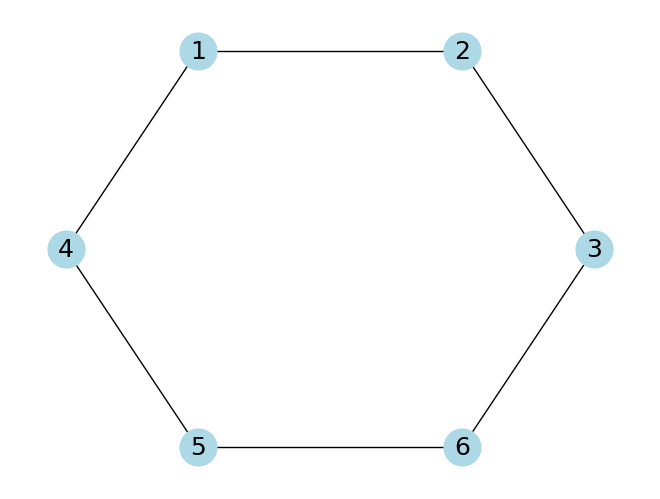

In [45]:
import networkx as nx
import numpy as np

params = {'node_color': 'lightblue', 'node_size' : 700, 'font_size': 18, 'with_labels': True}

g1 = nx.Graph()

g2 = nx.Graph()

# creates the edges
e1 = ((3, 2), (2,1), (1,4), (4,5), (5,6) ,(6,3))

e2 = ((0, 4) , (1, 0) , (2, 5) , (3, 2), (4, 3), (5,1))

# adds the edges.
g1.add_edges_from(e1)

g2.add_edges_from(e2)

# draws graph 1
nx.draw_circular(g1, **params)





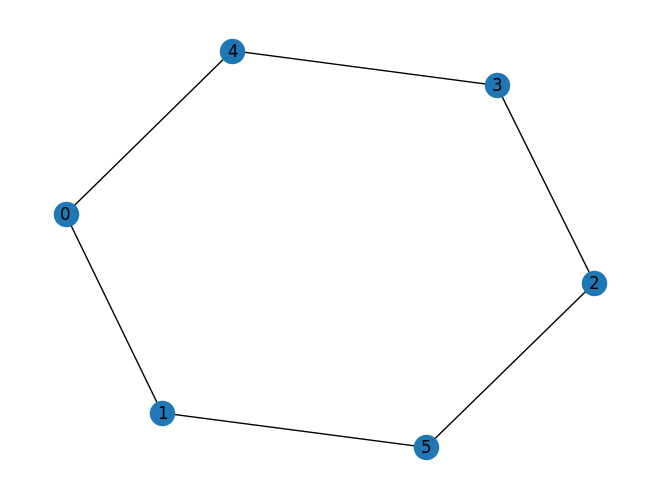

In [46]:
nx.draw(g2, with_labels=1)

In [47]:
nx.is_isomorphic(g1,g2)

True

As stated true the test above, both grahps are isomorphic as the result is true.

<h3>Checking if 2 graphs are NOT Isomoprhic</h3>

In [56]:
g3 = nx.Graph()
g4 = nx.Graph()

e1 = ((0,2), (1,4), (3,0), (2,1), (3,0), (5,4))
e2 = ((0,3), (1,0), (2,5), (4,2), (4,1), (5,1))

g3.add_edges_from(e1)
g4.add_edges_from(e2)

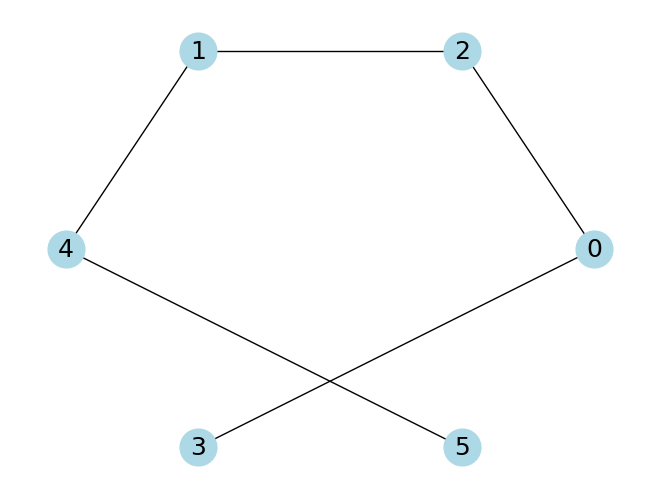

In [50]:
nx.draw_circular(g3, **params)

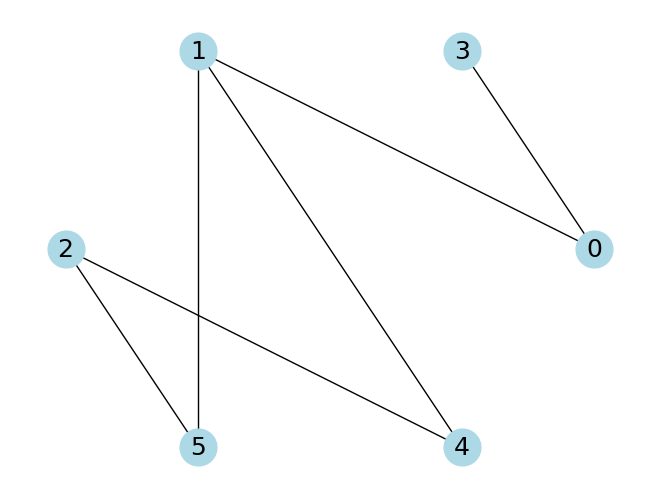

In [57]:
nx.draw_circular(g4, **params)

In [58]:
nx.is_isomorphic(g3,g4)

False

As stated false above, these two graphs are not isomorphic

<h2>P vs NP</h2>

<p>Considering the computational comlexity theory, which focuses on classifying computational probelms based on their resource usage and showing the realtion between thee classes. It is considered a task in which a computer solves.</p>

<p>So this brings me to complexity classes. Which is a set of resource based complexity. Time and Memory are considerecd the two most common resources analyzed. Two complexity classes i'll focus on are called P(polynomial time) and NP(nodeterministic ploynomial time). Graph Isomorphism is considerd an NP Problem.</p>

In relation to Graph Isomorphism Problem, it is not known to be solvable in polynomial time nor to be NP-complete and therefore is considered in the computational complexity class NP-intermediate.

Considering NP-intermediate problem after its mention above, it is seen as a decision problem that that is in NP. This means answers can be done in polynomial time but also means it is not in P and there is no polynomial-time algorithm for solving the problem. It also isnt considered to be NP-complete,

One of the biggest interests in the computers and mathematics sector is P versus NP.

When it comes to explaining it, people ask, can every problem whose answer can be checked quickly by a computer, also be quickly solved by a computer?

Math problems are referred to as P or NP, even if they are solvable in finite polynomial time. P prblems have their solution time bound to a polynomial and are relatively fast for computers to solve, which makes them 'easy'. NP are fast for computers to check, but arent easy to solve. 

This problem is a considered a millenium problem which is 7 big unanswered math problems.

<img src="pvsnp.jpg" style="width:400px;height:300px">

<h1>How graphs are represented in data structures</h2>

Graphs can be represented in 2 data structures: 

An adjacency list

An adjacency matrix

<h2>Adjacency List</h2>

Speaking on the topic of adjacency lists, every vertex is represented as a node object. The may contain data or reference a linked list. This linked list provides a list of all nodes that are adjacent to the current node.  

An example would be a graph containing an edge connecting node A and node B. Then node a will be available to node B's linked list.See below and example of an undirected graph.

<img src="undirected-list.png" style="width:400px;height:300px">


This can enable faster search proccesses against adjacency matrices. However it is not the brest representation of graphs espcially when it comes to adding or removing nodes. deleteing nodes involves a search through the adjacency lists to remove a particular node.

In [5]:
import networkx as nx
import matplotlib as plt

# Define the number of vertices in the graph
num_vertices = 4

# Create an empty adjacency list
adj_list = [[] for _ in range(num_vertices)]

# Define the edges of the graph
edges = [(0, 1), (0, 2), (1, 2), (2, 3)]

# Populate the adjacency list with the edges
for edge in edges:
    vertex1, vertex2 = edge
    adj_list[vertex1].append(vertex2)
    adj_list[vertex2].append(vertex1)

# Print the adjacency list
for i, neighbors in enumerate(adj_list):
    print(f"Vertex {i}: {neighbors}")

Vertex 0: [1, 2]
Vertex 1: [0, 2]
Vertex 2: [0, 1, 3]
Vertex 3: [2]


<h2>Adjacency Matrix</h2>


In relation to Adjacency matrices, we can consider them as a table of rows and columns. Rows and columns represent the nodes of a graph. This is a sqaure matrix where the number of rows, columns and nodes are the same. Each cell represents the edge or relationship between two nodes.

<h3>Example</h3>
<img src="undirected-graph.png" style="width:400px;height:300px">

In the above example is shows A is connected to B, but B is also connected to A as well. Hence both cells.

In [4]:
import networkx as nx
import matplotlib as plt

num_vertices = 4

# Create an empty adjacency matrix
adj_matrix = [[0 for _ in range(num_vertices)] for _ in range(num_vertices)]

# Define the edges of the graph
edges = [(0, 1), (0, 2), (1, 2), (2, 3)]

# Populate the adjacency matrix with the edges
for edge in edges:
    vertex1, vertex2 = edge
    adj_matrix[vertex1][vertex2] = 1
    adj_matrix[vertex2][vertex1] = 1

# Print the adjacency matrix
for row in adj_matrix:
    print(row)

[0, 1, 1, 0]
[1, 0, 1, 0]
[1, 1, 0, 1]
[0, 0, 1, 0]


<h2>References</h2>

http://www.dharwadker.org/tevet/isomorphism/

https://www.youtube.com/watch?v=EwV4Puk2coU


https://en.wikipedia.org/wiki/

Graph_theory#:~:text=In%20mathematics%2C%20graph%20theory%20is,also%20called%20links%20or%20lines

https://en.wikipedia.org/wiki/Graph_isomorphism_problem

https://cacm.acm.org/magazines/2020/11/248220-the-graph-isomorphism-problem/abstract

https://simple.wikipedia.org/wiki/P_versus_NP_problem

https://en.wikipedia.org/wiki/Complexity_class

https://en.wikipedia.org/wiki/Computational_complexity_theory

https://en.wikipedia.org/wiki/Graph_isomorphism_problem

https://stackoverflow.com/questions/40773886/what-are-np-intermediate-problems/40773945#40773945

https://www.javatpoint.com/graph-isomorphism-in-discrete-mathematics#:~:text=The%20isomorphism%20graph%20can%20be,are%20known%20as%20isomorphism%20graphs
https://tonicanada.medium.com/brute-force-code-for-isomorphisms-1241ef180570
https://www.mygreatlearning.com/blog/representing-graphs-in-data-structures/#:~:text=A%20graph%20can%20be%20represented,the%20nodes%20of%20a%20graph.

https://www.mygreatlearning.com/blog/representing-graphs-in-data-structures/#:~:text=A%20graph%20can%20be%20represented,the%20nodes%20of%20a%20graph.